# COMP3314 - Assignment 2

## Question 3: MNIST Visualizations (20 Points）

1. draw digits
2. pca before and after, draw digits
3. t-sne
4. 2-d pca

### Step 1: Download dataset
Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). In this experiment, we'll only be using the test set.

In [1]:
import tensorflow as tf
import numpy as np

(xs_train, ys_train), (xs_test, ys_test) = tf.keras.datasets.mnist.load_data()

# We'll only be using the test set.
xs = xs_test.reshape((xs_test.shape[0], -1))
ys = ys_test

print(f"xs shape: {xs.shape}")
print(f"ys shape: {ys.shape}")

2022-11-25 22:45:44.130473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


xs shape: (10000, 784)
ys shape: (10000,)


### Step 2: Visualize digits

Each hand-written MNIST digit is a 28x28 matrix. For each digit (0, 1, 2, ..., 9), pick one sample to visualize.

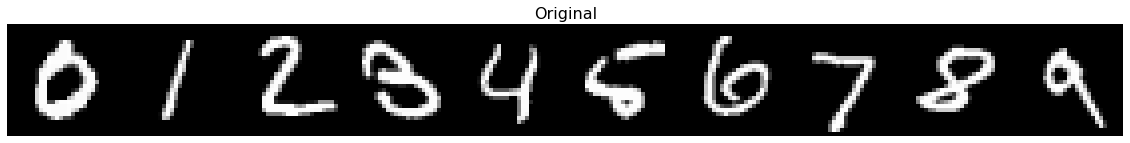

In [9]:
# === Your code here ===
import matplotlib.pyplot as plt
import matplotlib as mpl


def plot_digits(instances, images_per_row=10, **options):
    plt.figure(figsize=(20, 10))
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'gray', **options)
    plt.axis("off")

X_chosen = []
for i in range(10):
    X_chosen.append(xs[ys==i][0])

plot_digits(X_chosen, images_per_row=10)
plt.title("Original", fontsize=16)
plt.show()

### Step 3: PCA projection and recovery (5 Points)

The original dataset has 28x28=784 feature dimensions.

1. Use PCA to reduce the feature dimensions to [400, 200, 100, 50], respectively.
2. From the reduced dimension data, reproject the data back to 784 dimensions. Plot the results of the reprojected digits. For each PCA dimension, you should plot digits from 0-9, similar to step 2.

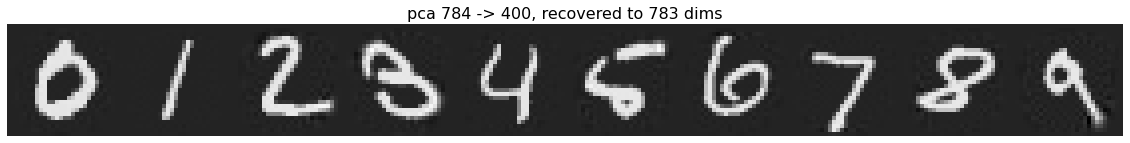

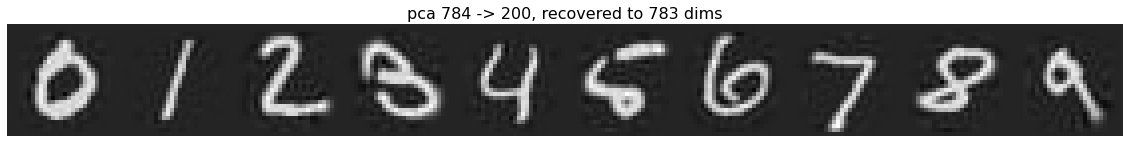

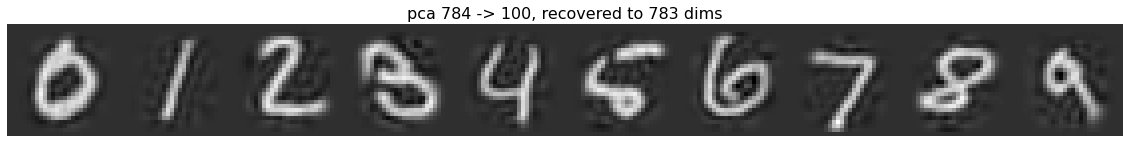

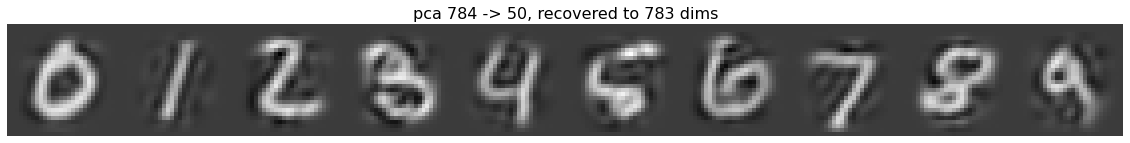

In [13]:
# === Your code here ===
from sklearn.decomposition import PCA
pcaList = [ PCA(n_components=400), PCA(n_components=200), PCA(n_components=100), PCA(n_components=50) ]
for pca in pcaList:
    xs_reduced = pca.fit_transform(xs)
    xs_recoverd = pca.inverse_transform(xs_reduced)
    X_chosen = []
    for i in range(10):
        X_chosen.append(xs_recoverd[ys==i][0])
    plot_digits(X_chosen)
    plt.title(f"pca 784 -> {pca.n_components_}, recovered to 783 dims", fontsize=16)
    plt.show()
# ======================

### Step 4: t-SNE visualization (5 Points)

Use t-SNE to reduce the MNIST dataset down to 2 dimensions and plot the result using Matplotlib. You should clearly see clusters of the digits from the visualization.

In [25]:
def visualize2DCluster(xs_reduced, ys):
    plt.figure().patch.set_facecolor('white')
    plt.scatter(xs_reduced[:, 0], xs_reduced[:, 1], lw=0.1,
                c=ys, cmap=plt.cm.get_cmap('tab20c', 10), marker='.')
    plt.colorbar(ticks=range(10), label='digit value')
    plt.grid(False)
    plt.show()

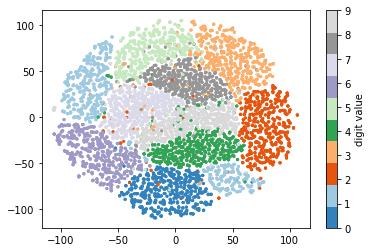

In [27]:
# === Your code here ===
from sklearn.manifold import TSNE
tSNE = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
xs_reduced_tSNE = tSNE.fit_transform(xs)
visualize2DCluster(xs_reduced_tSNE, ys)
# ======================

### Step 5: PCA visualization (5 Points)

Next, let's use PCA to project the data to 2 dimension. Visualize the 2D data again. Which one performs better, t-SNE or PCA?

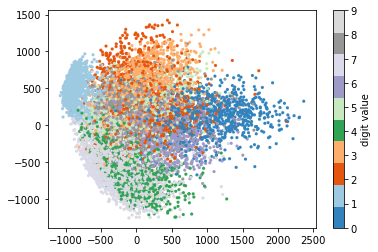

In [28]:
# === Your code here ===
pca = PCA(n_components=2)
xs_reduced_pca = pca.fit_transform(xs)
visualize2DCluster(xs_reduced_pca, ys)
# === Your code here ===

**Obviously, t-SNE performs much better than PCA.**